/tmp/ipykernel_1740578/1514419615.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')(labels.detach().cpu().numpy())


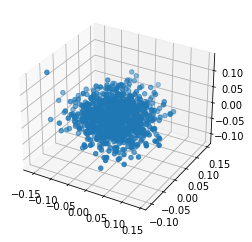

/tmp/ipykernel_1740578/1514419615.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')(labels.detach().cpu().numpy())


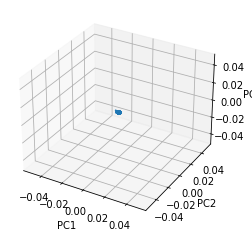

tensor(0.0036) tensor(0.9810) tensor([0.9832, 0.9780, 0.9814, 0.9854, 0.9738, 0.9803, 0.9787, 0.9813, 0.9821,
        0.9757, 0.9767, 0.9789, 0.9846, 0.9852, 0.9826, 0.9840, 0.9758, 0.9803,
        0.9821, 0.9851, 0.9819, 0.9862, 0.9827, 0.9828, 0.9847, 0.9838, 0.9764,
        0.9771, 0.9797, 0.9808, 0.9856, 0.9842, 0.9876, 0.9800, 0.9759, 0.9859,
        0.9840, 0.9822, 0.9729, 0.9824, 0.9779, 0.9832, 0.9769, 0.9805, 0.9775,
        0.9802, 0.9746, 0.9844, 0.9832, 0.9708, 0.9822, 0.9738, 0.9812, 0.9855,
        0.9783, 0.9770, 0.9797, 0.9847, 0.9792, 0.9778, 0.9792, 0.9855, 0.9821,
        0.9795, 0.9804, 0.9838, 0.9863, 0.9813, 0.9758, 0.9832, 0.9808, 0.9833,
        0.9804, 0.9791, 0.9798, 0.9840, 0.9770, 0.9778, 0.9830, 0.9799, 0.9852,
        0.9856, 0.9795, 0.9787, 0.9818, 0.9802, 0.9828, 0.9826, 0.9838, 0.9767,
        0.9814, 0.9825, 0.9799, 0.9784, 0.9764, 0.9807, 0.9690, 0.9766, 0.9856,
        0.9816, 0.9853, 0.9781, 0.9789, 0.9873, 0.9730, 0.9767, 0.9810, 0.9830,
        0.

In [127]:
# prompt: write code that visualises high dimension embeddings in 3d

import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

def warp(embeddings: torch.Tensor) -> torch.Tensor:
        """
        Apply oscillation to the input embeddings tensor.

        Parameters:
            embeddings (torch.Tensor): A PyTorch tensor containing embeddings or data to oscillate.

        Returns:
            torch.Tensor: A PyTorch tensor of the same shape as 'embeddings' after applying oscillation.
        """
        scales = torch.normal(mean=0.0, std=0.2, size=embeddings.shape) + 1
        embeddings = embeddings * scales.to(embeddings.device)
        return F.normalize(embeddings, p=2, dim=0)


def visualize_embeddings(embeddings: torch.Tensor, labels: torch.Tensor, num_samples: int):
    """
    Visualize the embeddings in 3D using PCA.

    Parameters:
        embeddings (torch.Tensor): A PyTorch tensor containing embeddings or data to visualize.
        labels (torch.Tensor): A PyTorch tensor containing labels for the data.
        num_samples (int): The number of samples to visualize.

    Returns:
        None
    """
    embeddings = embeddings.detach().cpu().numpy()
    pca = PCA(n_components=3)
    pca.fit(embeddings)
    components = pca.components_
    projected_embeddings = np.matmul(embeddings, components.T)
    colors = plt.cm.get_cmap('tab10')(labels.detach().cpu().numpy())
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(projected_embeddings[:, 0], projected_embeddings[:, 1], projected_embeddings[:, 2], c=colors)
    plt.show()

def visualize_embeddings_as_vectors(embeddings: torch.Tensor, labels: torch.Tensor, num_samples: int, scale_factor=0.018):
    """
    Visualize the embeddings in 3D as vectors using PCA.

    Parameters:
        embeddings (torch.Tensor): A PyTorch tensor containing embeddings or data to visualize.
        labels (torch.Tensor): A PyTorch tensor containing labels for the data.
        num_samples (int): The number of samples to visualize.
        scale_factor (float): Factor to scale down the vectors.

    Returns:
        None
    """
    embeddings = embeddings.detach().cpu().numpy()
    pca = PCA(n_components=3)
    pca.fit(embeddings)
    components = pca.components_
    projected_embeddings = np.matmul(embeddings, components.T)
    projected_embeddings = projected_embeddings * scale_factor
    colors = plt.cm.get_cmap('tab10')(labels.detach().cpu().numpy())
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(min(num_samples, len(projected_embeddings))):
        ax.quiver(0, 0, 0, projected_embeddings[i, 0], projected_embeddings[i, 1], projected_embeddings[i, 2], color=colors[i])

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.show()

def cosine_similarities(source, candidates):
    dot_products = torch.einsum("ij,j->i", candidates, source)
    norm_source = torch.sqrt(torch.einsum('i,i->', source, source))
    norm_candidates = torch.sqrt(torch.einsum('ij,ij->i', candidates, candidates))
    return dot_products / (norm_source * norm_candidates)

n_warps = 1000
embedding = torch.randn(128)
warps = torch.stack([warp(embedding) for _ in range(n_warps)])
visualize_embeddings(warps, torch.zeros(n_warps), n_warps)
visualize_embeddings_as_vectors(warps, torch.zeros(n_warps), n_warps)
warp_similarities = cosine_similarities(embedding, warps)
print(warp_similarities.std(), warp_similarities.mean(), warp_similarities)

In [ ]:
import numpy as np
import latexify

@latexify.function
def loss(a, b):
    # Convert lists to numpy arrays
    a = np.array(a)
    b = np.array(b)

    # L2 normalization for 'a' and 'b'
    a_normalized = a / np.linalg.norm(a, axis=1, keepdims=True)
    b_normalized = b / np.linalg.norm(b, axis=1, keepdims=True)

    # Warp 'a' and 'b'
    scale_a = np.random.normal(0, 0.1, a_normalized.shape) + 1
    scale_b = np.random.normal(0, 0.1, b_normalized.shape) + 1
    a_warped = a_normalized * scale_a
    b_warped = b_normalized * scale_b

    # Compute similarity matrix (a_warped @ b_warped^T)
    similarity_matrix = np.dot(a_warped, b_warped.T)

    # Apply softmax to the similarity matrix and its transpose
    exp_matrix = np.exp(similarity_matrix - np.max(similarity_matrix, axis=1, keepdims=True))
    softmax_matrix = exp_matrix / np.sum(exp_matrix, axis=1, keepdims=True)

    exp_matrix_T = np.exp(similarity_matrix.T - np.max(similarity_matrix, axis=0, keepdims=True))
    softmax_matrix_T = exp_matrix_T / np.sum(exp_matrix_T, axis=0, keepdims=True)

    # Compute cross-entropy loss for 'a' and 'b'
    labels = np.arange(similarity_matrix.shape[0])
    loss_a = -np.mean(np.log(softmax_matrix[np.arange(len(labels)), labels]))
    loss_b = -np.mean(np.log(softmax_matrix_T[np.arange(len(labels)), labels]))

    return (loss_a + loss_b) / 2


loss